In [2]:
from dotenv import load_dotenv
load_dotenv()

from agent import PlanAgent
from langchain_openai import ChatOpenAI

from langchain_core.tools import tool

@tool("search")
def calculate(input_str: str) -> str:
    """Usesl Python `eval` to evaluate the input string and returns the result"""
    try:
        result = eval(input_str)
    except Exception as e:
        result = f"Error: {e} with input {input_str}"
    
    return result

prompt = """You are a smart assistant. Use the evaluate tool to evaluate math functions \
the evaluate tool uses python eval to evaluate the math equation string.
"""

model = ChatOpenAI(model="gpt-3.5-turbo")  #reduce inference cost
abot = PlanAgent(model, [calculate])

In [4]:
from langchain_core.messages import AnyMessage, SystemMessage, HumanMessage, ToolMessage

messages = [HumanMessage(content="(5+5)/2 + (2.5*4)")]
result = abot.graph.invoke({"messages": messages})

print(5*"\n")
print(result)
print(result['messages'][-1].content)

KeyError: 'current_path'

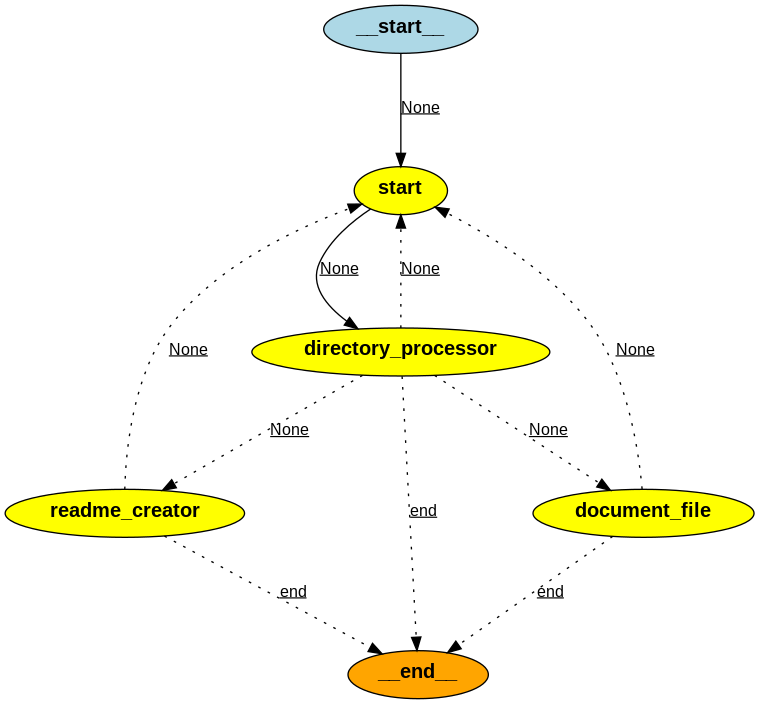

In [3]:
from IPython.display import Image

Image(abot.graph.get_graph().draw_png())